# Schrodinger in au: -$\frac{1}{2\mu  }\frac{d^2\psi}{dr^2} + (\frac{l(l+1)}{2\mu r^2} + V(r))\psi = E\psi$ 
### $\psi'' = -2\mu(E - \frac{l(l+1)}{2\mu r^2} - V(r))\psi$
### $\implies \psi'' + 2\mu(E - \frac{l(l+1)}{2\mu r^2} - V(r))\psi = 0$
### $\psi'' + k^2(r)\psi = 0$
### define  $k^2(r) = 2\mu(E - V(r) - \frac{l(l+1)}{2\mu r^2})$

### $\psi(r_{n + 1}) - 2\psi(r_{n}) + \psi(r_{n - 1})  + k^2(r_{n})\psi(r_{n}) = 0$


### $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(dr)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(dr)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(dr)^2k^2_{n+1}}    $



https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Time_Dependent_Quantum_Mechanics_and_Spectroscopy_(Tokmakoff)/01%3A_Overview_of_Time-Independent_Quantum_Mechanics/1.05%3A_Numerically_Solving_the_Schrodinger_Equation

https://www.youtube.com/watch?v=kuP-tkQen1k

https://cocalc.com/projects/45117c74-7840-4124-9f55-83089957de21/files/handouts/TutorialSolutions/tutorial16.md

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://indico.mitp.uni-mainz.de/event/279/sessions/996/attachments/2961/3450/presentation.pdf


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
from scipy import integrate
N = 5000 # number of iterator steps

## Step 1: Finding $\psi(r)$ numerically, $l$ = 0, $k^2(r) = 2\mu(E - V(r))$

In [5]:
tol = 1e-4
r = np.linspace(1e-30,80, N) # range of r values to iterate over, 0 -> 80 Bohr radii
dr = r[1] - r[0] # spacing dr, h in above equations
print(f' dr = {dr}')
psi = np.zeros(N)  # Initializing psi(r) as array of zeros

Vo = -0.00003166808534191 # -10K in Hartrees for the potential depth
Vr = np.zeros(N) # Initialize the square well potential V(r)
Vr[0:int(round(N/2))] = Vo # replace all entries up to r = 40 Bohr radii with -10K in Hartrees
Eo = 1e5*3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium


#print(f' mu = {mu}')
#print(f' k[49950:50020] = {k[49950:50020]}')


 dr = 0.016003200640128026


## $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(dr)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(dr)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(dr)^2k^2_{n+1}}    $

 Psi(0) = 0.0


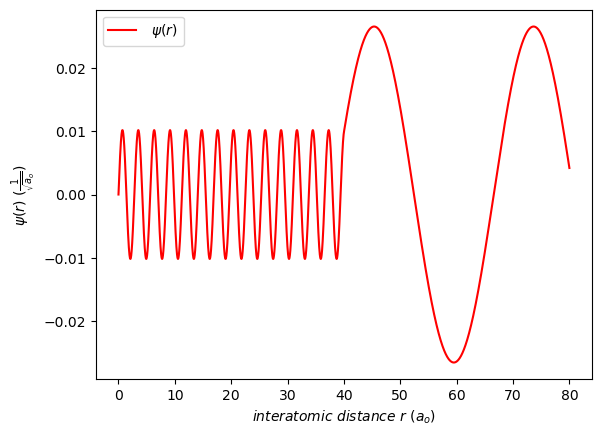

In [7]:
def wavefunction(Energy, N): # function to find psi(r)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - Vr) # wave number squared for the energy

    for i in range(2,N):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
         #   print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*k[i-1])*psi[i-1])}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])

            
    return psi
Psi_r = wavefunction(Eo,N)
def normalization(PSI): # normalization function
    psi_sq = (wavefunction(Eo,N)/r)**2  # (psi/r)^2 for the integral
    I = scipy.integrate.simpson(psi_sq, dx = 1) # integration of psi^2
    normalization_constant = 1/I #to properly normalize, divide by the value of the integral over the whole region in which it is defined
    return normalization_constant 
Psi = Psi_r*(normalization(Psi_r))
print(f' Psi(0) = {Psi[0]}')
plt.plot(r, Psi, label = f' $\\psi(r)$', color = 'red') 
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

## Step 2: Calculate derivative, find phase shift $ \delta $

### $\psi(r) = sin(kr + \delta), \frac{d\psi}{dr} = kcos(kr + \delta)$
### $\frac{\psi}{\frac{d\psi}{dr}} = \frac{1}{k}tan(kr + \delta)$
### $tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) = kr + \delta$
### $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $

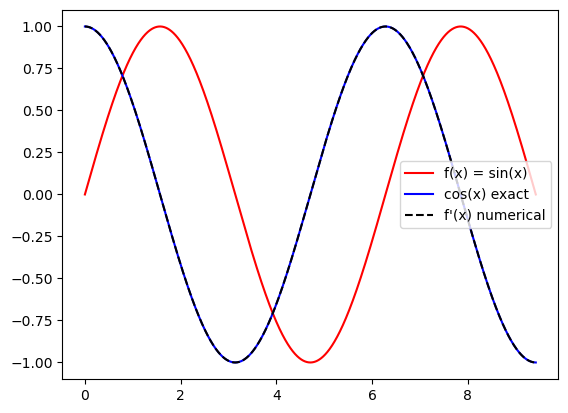

In [10]:
x = np.linspace(0,3*np.pi, N)
fx = np.sin(x)
fpx = np.gradient(fx, x)
plt.plot(x, fx, label = 'f(x) = sin(x)', color = 'red')
plt.plot(x, np.cos(x), label = 'cos(x) exact', color = 'blue')
plt.plot(x, fpx, label = "f'(x) numerical", color = 'black', linestyle = 'dashed')
plt.legend()

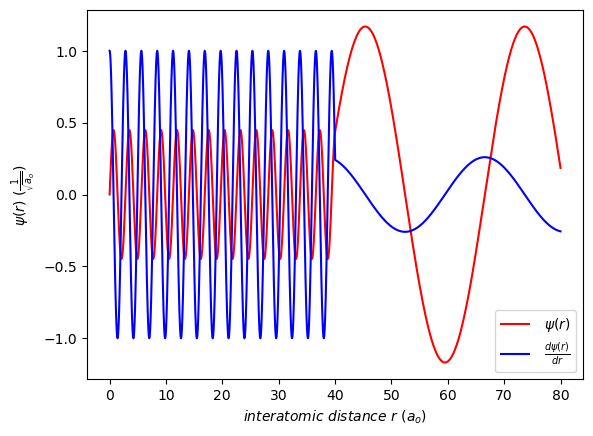

In [11]:
psi_prime = np.gradient(Psi_r, r)

plt.plot(r, Psi_r, label = f' $\\psi(r)$', color = 'red') 
plt.plot(r, psi_prime, label = ' $\\frac{d \\psi(r)}{dr}$', color = 'blue') 
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()


 delta expected = -8.503667791849654
1
 the numerical result for delta = -8.505742236874319
 delta numerical divided by delta analytical = 1.000243947091472


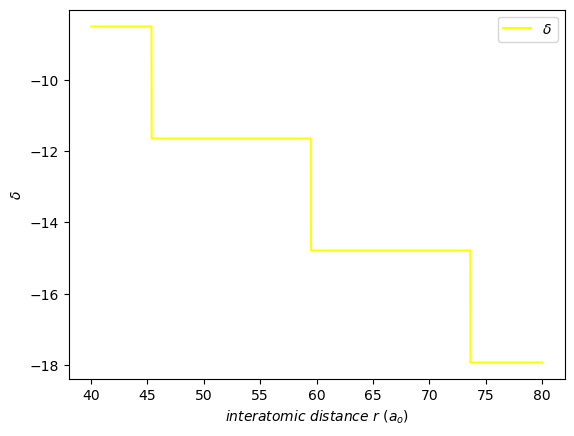

In [12]:
K = np.sqrt(2*mu*(Eo - Vo))
k = np.sqrt(2*mu*Eo)
a = 40
delta_a = np.arctan((k/K)*np.tan(K*a)) - k*a
print(f' delta expected = {delta_a}')
kosq = 2*mu*(Eo - Vr)

delt = np.arctan((np.sqrt(kosq)*Psi_r)/(psi_prime)) - np.sqrt(kosq)*r

for i in range(N):
    if abs(delt[i] - delta_a) < 1e-6:
        index = i
        print(f' numerical delta matches expected analytical result at i = {i}')
        break
        
#print(f' delta actual = {delta}, delta numeric = {delt}')
#print(delta)
#print(delt[index])

plt.plot(r[int(N/2):N], delt[int(N/2):N], color = 'yellow', label = '$\\delta$')
plt.ylabel('$\\delta$')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.legend()

jumps = []

for i in range(1,N):
    if abs(delt[i] - delt[i-1]) > 2*np.pi:
        jumps.append(i)
        break

#for i in range(len(jumps)):
 #   plt.vlines(r[jumps[i]], min(r), max(r), linestyle = 'dashed', color = 'black')
print(len(jumps))
#print(f' delta = {delt[jumps[26]] - 2*np.pi}')

delta_n = delt[jumps[0]]
print(f' the numerical result for delta = {delta_n}')
print(f' delta numerical divided by delta analytical = {delta_n/delta_a}')

 delta expected = -8.503667791849654
 delta diff = -1.0


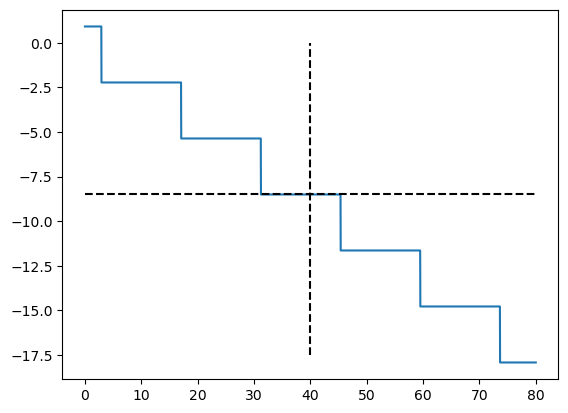

In [14]:
K = np.sqrt(2*mu*(Eo - Vo))
k = np.sqrt(2*mu*Eo)
a = 40
delta = np.arctan((k/K)*np.tan(K*a)) - k*a
print(f' delta expected = {delta}')

wavelength = 2*np.pi/k
#print(f' wavelength = {wavelength} ao^-1')




ur_in = np.sin(K*r)
ur_inprime = K*np.cos(K*r)

ur_out = np.sin(k*r + delta)
ur_outprime = k*np.cos(k*r + delta)

d = np.arctan((k*ur_out)/ur_outprime) - k*r

vals = [d[0]]
for i in range(1, N):
    if abs(d[i] - d[i - 1]) > 1:
        vals.append(d[i])
print(f' delta diff = {(vals[6] - vals[5])/np.pi}')

#print(d[39015])
plt.plot(r, d)
plt.hlines(delta, min(r), max(r), linestyle = 'dashed', color = 'black')
plt.vlines(a, -17.5, 0, linestyle = 'dashed', color = 'black')
#print(f' delta numeric = {d[-9850]}')
#print(f' delta/2pi = {d/(2*np.pi)}')

### $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $

## Step 3, determine and compare numerical and analytical cross section $\sigma$ as a function of delta
## $\sigma = \frac{\pi}{k^2} sin^2(\delta)$

In [18]:
sigma_a = (np.pi)*(k**2)*(np.sin(delta_a)**2)
sigma_n = (np.pi)*(kosq[-1])*(np.sin(delta_n)**2)

print(f' sigma analytic = {sigma_a}')
print(f' sigma numeric = {sigma_n}')

 sigma analytic = 0.09827861063338036
 sigma numeric = 0.0979686633895093


## Previously acquired results

C:\Users\nienn\AppData\Local\Temp\ipykernel_11164\2915195921.py:43: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(1e-4, 0)


(0.0001, 2.8183800139116473)

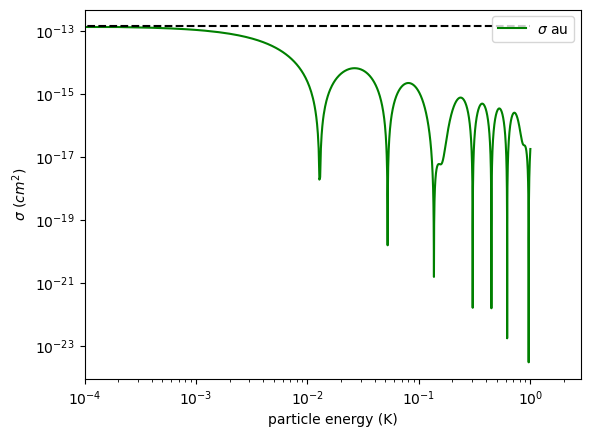

In [21]:
H_to_K = 1//0.000003166808534191

me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams

mrb = mrb_g/me # rubidium mass in au
mu = (mrb*mrb)/(mrb + mrb)
#print(f' rubidium mass = {mrb} au')
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs

ao = (hbar**2)/(me*e**2) # Bohr radius in cgs
#print(f" Bohr radius = {ao}cm")
EH = (hbar**2)/(me*(ao**2)) # 1 Hartee
#print(f' The Hartree is = {EH}')

E = np.linspace(3.166808534191e-15, 0.000003166808534191, N) # # particle energy from 1nK -> 1K in au
Vo = -(10*0.000003166808534191) # well depth of -10K in au
a = 40 # 40 Bohr radii 

k = np.sqrt(2*mu*E) # wave number outside the well in ao^-1
K = np.sqrt(2*mu*(E-Vo)) # wave number inside the well in ao^-1
d = np.arctan((k/K)*np.tan(K*a)) - k*a # phase shift
sigma = (np.pi/(k**2))*(np.sin(d))**2 # cross section in ao^2

Ko = np.sqrt(2*mu*(-Vo)) # low energy approximation for wave number insdie the well in ao^-1
a_s = a - (np.tan(Ko*a)/Ko) # scattering length in ao
sigma_approx = np.pi*(a_s)**2 # low energy approximation for cross section in ao^2


#print(f' E = {E}')
#print(f' a_s = {a_s}ao')
#print(f' mass of rubidium = {mrb} au')
#print(f' sigma approx = {sigma_approx*(ao**2)}')


plt.loglog(E*H_to_K, sigma*(ao**2), label = f'$\\sigma$ au', color = 'green')
plt.hlines(sigma_approx*(ao**2), min(E)*H_to_K, max(E)*H_to_K, linestyle = 'dashed', color = 'black')
plt.legend()
plt.xlabel('particle energy (K)')
plt.ylabel(f'$\\sigma$ ($cm^2$)')

plt.xlim(1e-4, 0)

Text(0, 0.5, '$\\sigma$ ($cm^2$)')

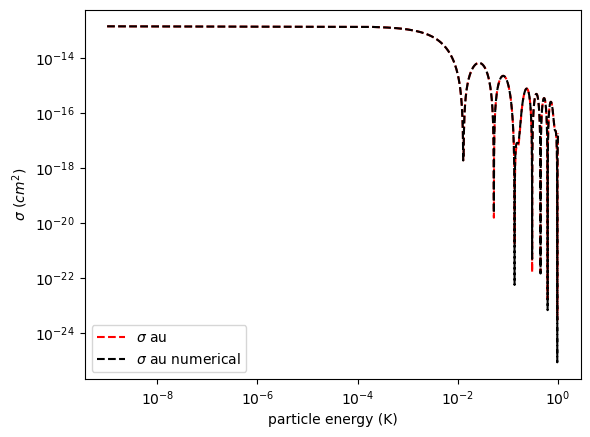

In [25]:
Sigma_n = []

for i in range(N):
    delta_jump = []
    
    knsq = 2*mu*(E[i] - Vr)
    PSI = wavefunction(E[i],N) # wave function to find using Numerov
    #plt.plot(r, PSI)
    PSI_prime = np.gradient(PSI, r) # find derivative of PSI Numerov
    #plt.plot(r, PSI)
    if  0 <= i <= N:
        Delta = np.arctan((np.sqrt(knsq)*PSI)/(PSI_prime)) - np.sqrt(knsq)*r
        for j in range(N):
            if abs(Delta[j] - Delta[j-1]) > 19*np.pi:
                delta_jump.append(j)
                Delta_n = Delta[delta_jump[0]]
                #if abs(Delta_n - d) > 1e-3:
                 #   print(f'delta_n = {Delta_n}, delta_a = {d}')
    Sigmer = (np.pi/(knsq[-1]))*(np.sin(Delta_n)**2)
    Sigma_n.append(Sigmer*(ao**2))
    #print(f' delta a/delta n = {d/Delta_n}')
    #print(f' sin(delta a)/sin(delta n) = {((np.sin(d))**2)/((np.sin(Delta_n))**2)}')
    #print(f' k a/k n = {k**2/knsq[-1]}')
    #print(f' sigma analytic/simga n = {sigma_a/Sigmer}')
    #print(f' sigma numeric = {Sigmer}')


plt.loglog(E*H_to_K, sigma*(ao**2), label = f'$\\sigma$ au', color = 'red', linestyle = 'dashed')
plt.loglog(E*H_to_K, Sigma_n, color  = 'black', label = f'$\\sigma$ au numerical', linestyle = 'dashed')
plt.legend()
plt.xlabel('particle energy (K)')
plt.ylabel(f'$\\sigma$ ($cm^2$)')